Decision Tree

Tiatnic Survival Dataset

In [3]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split





In [4]:
#Load the data sets- train and test 
# from sklearn.model_selection import train_test_split
# y=df[["Survived"]]

# x=df.drop(columns=["Survived"])
df=pd.read_csv("train.csv")


In [5]:
#Look at top values of train data 


df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Print the dimension of train and test data
print(df.shape)

(891, 12)


In [8]:
#Print the number of missing values in each column of train and test data
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

In [9]:
#Barchart of Survived, Pclass, Sex, Embarked

In [10]:
#Histogram of Age, Parch, Fare

In [11]:
#Plot histogram of age for survived and did not survived class

In [12]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

In [13]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [14]:
#Replace the msiing values in Embarked column by 'S'
df["Embarked"].fillna('S',inplace=True)

df["Embarked"].isnull().sum()

0

In [15]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(),inplace=True)

df["Fare"].isnull().sum()

0

In [16]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data


mean_age=df["Age"].mean()

std_age=df["Age"].std()

mean_age

std_age

random_ages=np.random.normal(loc=mean_age,scale=std_age,size=df["Age"].isnull().sum())


df.loc[df["Age"].isnull(),"Age"]=random_ages

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.907963,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [17]:
df["Age"].isnull().sum()

0

## Feature Engineering - Creating new features

In [18]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df["FamilySize"]=df["Parch"]+df["SibSp"]+1


df["FamilySize"].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [19]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df["IsAlone"]=df["FamilySize"]==1

df["IsAlone"].head()

0    False
1    False
2     True
3    False
4     True
Name: IsAlone, dtype: bool

In [20]:
## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True

# df["Has_Cabin"] =False  if df["Cabin"].isnull() else True

df["Has_Cabin"]=-df["Cabin"].isnull()


df["Has_Cabin"].head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Has_Cabin'],
      dtype='object')

In [21]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin


df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)


## Model Building

In [22]:
2️⃣ Mind as an Enemy (Uncontrolled Mind)

You start overthinking: "What if I fail? What if people judge me?"
You keep making excuses and never take action.
Your mind demotivates you: "You’re not good enough. Just give up."
Result: You stay stuck.
#Prepare X and y



In [36]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# df.dtypes

# df=pd.get_dummies(df,columns=["Sex","Embarked"], drop_first=True)

df = pd.get_dummies(df, columns=["Sex", "Embarked"],drop_first=True).astype(int)  # One-Hot Encoding
# df = df.astype(int)
# df[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]] = \
# df[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]].astype(int)

df


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,2,0,0,1,0,1
1,1,1,38,1,0,71,2,0,1,0,0,0
2,1,3,26,0,0,7,1,1,0,0,0,1
3,1,1,35,1,0,53,2,0,1,0,0,1
4,0,3,35,0,0,8,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,1,0,1,0,1
887,1,1,19,0,0,30,1,1,1,0,0,1
888,0,3,23,1,2,23,4,0,0,0,0,1
889,1,1,26,0,0,30,1,1,1,1,0,0


In [37]:

x=df.drop(columns=["Survived"])
y=df["Survived"]


x


,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7,2,0,0,1,0,1
1,1,38,1,0,71,2,0,1,0,0,0
2,3,26,0,0,7,1,1,0,0,0,1
3,1,35,1,0,53,2,0,1,0,0,1
4,3,35,0,0,8,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,1,1,0,1,0,1
887,1,19,0,0,30,1,1,1,0,0,1
888,3,23,1,2,23,4,0,0,0,0,1
889,1,26,0,0,30,1,1,1,1,0,0


In [25]:
# concat df_categorical with original df

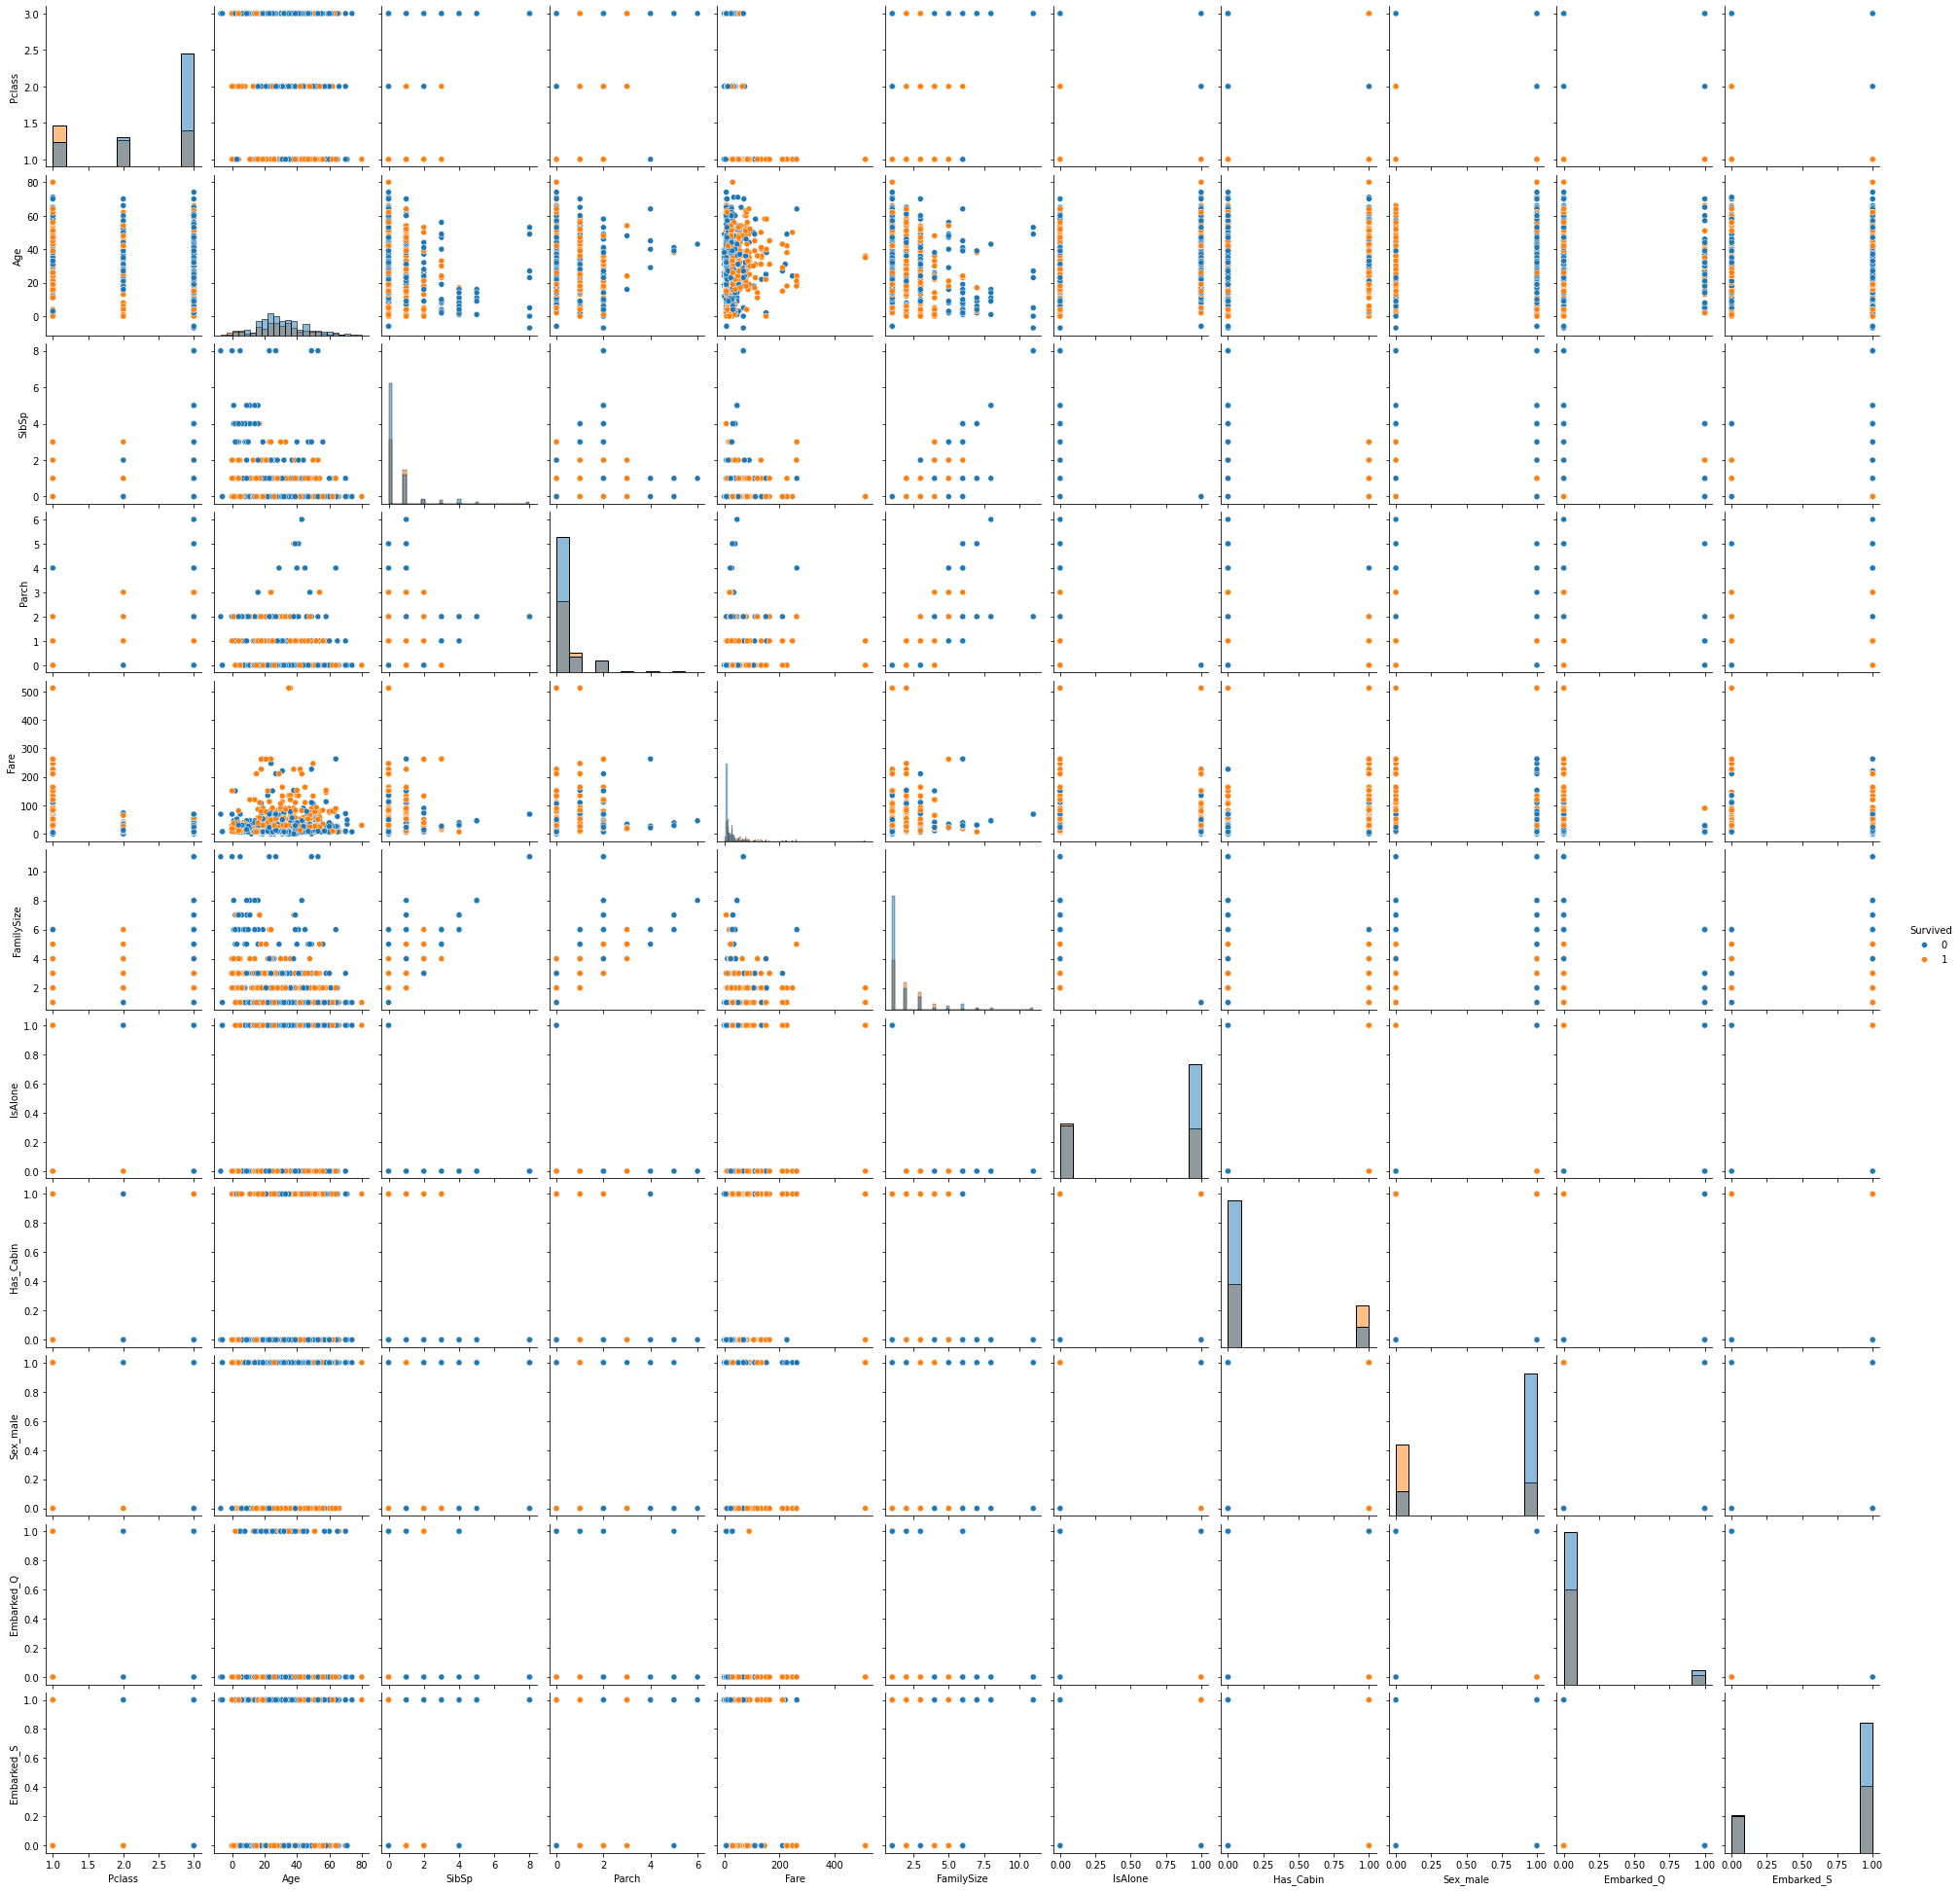

In [38]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of all numerical features
sns.pairplot(df, hue="Survived", diag_kind="hist")
plt.show()




,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_Cabin
165,3,male,9.000000,0,2,20.5250,S,3,False,False
541,3,female,9.000000,4,2,31.2750,S,7,False,False
625,1,male,61.000000,0,0,32.3208,S,1,True,True
388,3,male,36.726164,0,0,7.7292,Q,1,True,False
76,3,male,42.000711,0,0,7.8958,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,7.6500,S,1,True,False
270,1,male,47.184580,0,0,31.0000,S,1,True,False
860,3,male,41.000000,2,0,14.1083,S,3,False,False
435,1,female,14.000000,1,2,120.0000,S,4,False,True


In [41]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


from sklearn.model_selection import train_test_split



X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.1, random_state=42)


print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)



X_train



X_train shape: (801, 11)
X_validation shape: (90, 11)
y_train shape: (801,)
y_validation shape: (90,)


,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
165,3,9,0,2,20,3,0,0,1,0,1
541,3,9,4,2,31,7,0,0,0,0,1
625,1,61,0,0,32,1,1,1,1,0,1
388,3,36,0,0,7,1,1,0,1,1,0
76,3,42,0,0,7,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,3,21,0,0,7,1,1,0,0,0,1
270,1,47,0,0,31,1,1,0,1,0,1
860,3,41,2,0,14,3,0,0,1,0,1
435,1,14,1,2,120,4,0,1,0,0,1


In [42]:
X_train


,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
165,3,9,0,2,20,3,0,0,1,0,1
541,3,9,4,2,31,7,0,0,0,0,1
625,1,61,0,0,32,1,1,1,1,0,1
388,3,36,0,0,7,1,1,0,1,1,0
76,3,42,0,0,7,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,3,21,0,0,7,1,1,0,0,0,1
270,1,47,0,0,31,1,1,0,1,0,1
860,3,41,2,0,14,3,0,0,1,0,1
435,1,14,1,2,120,4,0,1,0,0,1


In [43]:
# df=df.drop(columns=["Name"],inplace=True)

df


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,2,0,0,1,0,1
1,1,1,38,1,0,71,2,0,1,0,0,0
2,1,3,26,0,0,7,1,1,0,0,0,1
3,1,1,35,1,0,53,2,0,1,0,0,1
4,0,3,35,0,0,8,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,1,0,1,0,1
887,1,1,19,0,0,30,1,1,1,0,0,1
888,0,3,23,1,2,23,4,0,0,0,0,1
889,1,1,26,0,0,30,1,1,1,1,0,0


In [33]:
print(df)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  23.907963      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

     FamilySize  IsAlone  Has_Cabin  
0             2    False      False  
1          

In [44]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_validation)

accuracy_score=accuracy_score(y_validation,y_pred)


accuracy_score


# y_test_predict=model.predict(y_train)


# accuracy_test=accuracy_score(y_test,y_test_predict)

0.8111111111111111

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Create the Decision Tree model
# model = DecisionTreeClassifier(random_state=42)  # Default hyperparameters

# # Train (fit) the model on training data
# model.fit(X_train, y_train)

# # Predict on validation set
# y_pred = model.predict(X_validation)

# # Evaluate accuracy
# accuracy = accuracy_score(y_validation, y_pred)

# # Print accuracy
# print("Validation Accuracy:", accuracy)


|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Pclass <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pclass >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.50
|   |   |   |   |--- Fare <= 27.50
|   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |   |--- FamilySize <= 2.00
|   |   |   |   |   |   |   |   |   |--- Has_Cabin <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Has_Cabin >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- FamilySize >  2.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  24.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--

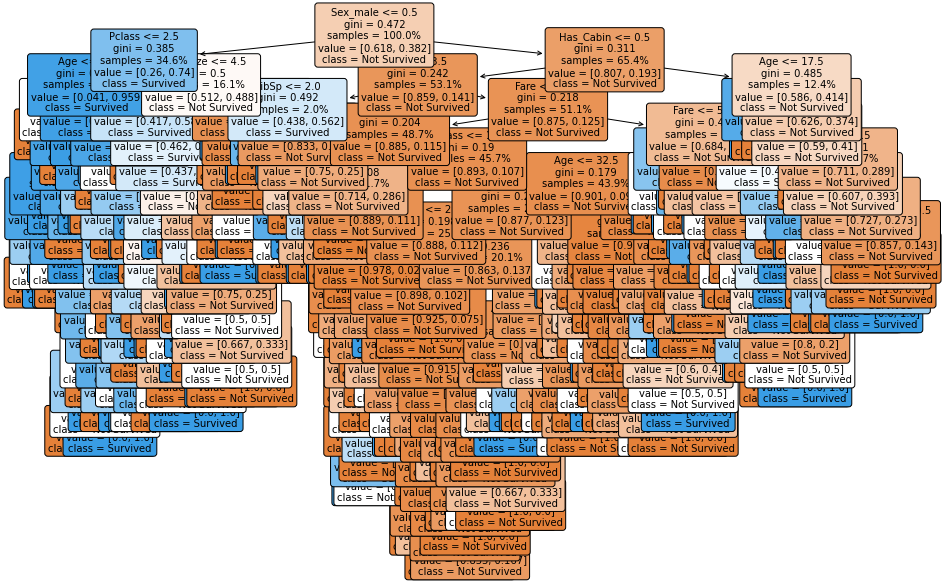

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Print tree rules as text
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

# Plot the Decision Tree (Top-Down by Default)
plt.figure(figsize=(15, 10))  # Adjust size for better readability
plot_tree(model, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True, proportion=True, fontsize=10)
plt.show()


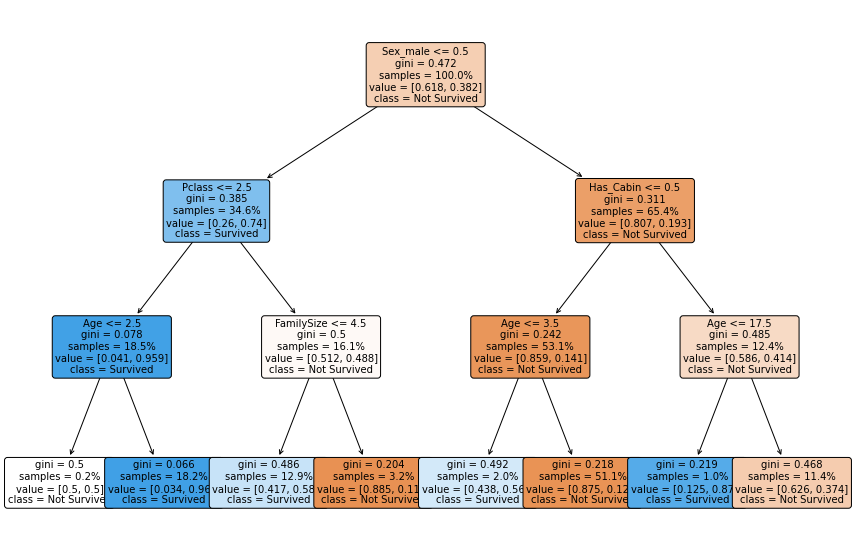

In [46]:
# plotting tree with max_depth=3
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the Decision Tree model with max_depth=3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Plot the Decision Tree with max_depth=3
plt.figure(figsize=(15, 10))  # Adjust figure size for readability
plot_tree(model, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True, proportion=True, fontsize=10)
plt.show()


<img src="tree2.png">

Accuracy: 0.8333

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



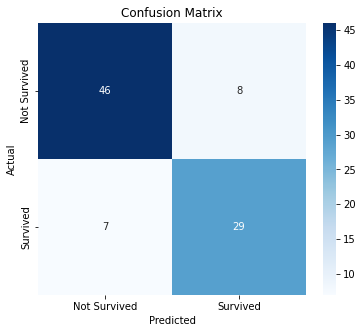

In [48]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_validation)

# Compute evaluation metrics
accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)
conf_matrix = confusion_matrix(y_validation, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.8333

Confusion Matrix:
[[46  8]
 [ 7 29]]


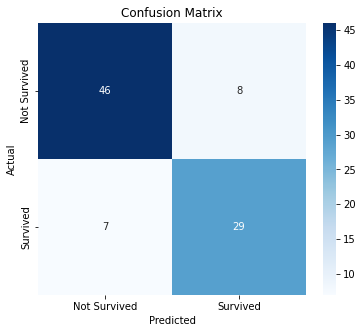

In [49]:
# Printing confusion matrix and accuracy

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_validation)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_validation, y_pred)

# Print Accuracy
print(f"Accuracy: {accuracy:.4f}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
